# Preparacion

## importacion de librerias

In [47]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import  display
from IPython.display import display_html

from matplotlib.colors import LinearSegmentedColormap


## base de datos

In [2]:
# Read CSV
coffee_df = pd.read_csv('../Data/coffee_shop_sales.csv', encoding='ascii')

In [6]:
coffee_df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [7]:
coffee_df.describe(include='all').transpose().head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_id,149116.0,NaN,NaN,NaN,74737.371872,43153.600016,1.0,37335.75,74727.5,112094.25,149456.0
transaction_date,149116,181,19-06-2023,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_time,149116,25762,09:31:15,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,149116.0,NaN,NaN,NaN,5.342063,2.074241,3.0,3.0,5.0,8.0,8.0
store_location,149116,3,Hell's Kitchen,50735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,149116.0,NaN,NaN,NaN,47.918607,17.93002,1.0,33.0,47.0,60.0,87.0
transaction_qty,149116.0,NaN,NaN,NaN,1.438276,0.542509,1.0,1.0,1.0,2.0,8.0
unit_price,149116.0,NaN,NaN,NaN,3.382219,2.658723,0.8,2.5,3.0,3.75,45.0
Total_Bill,149116.0,NaN,NaN,NaN,4.686367,4.227099,0.8,3.0,3.75,6.0,360.0
product_category,149116,9,Coffee,58416,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Descriptivo

In [23]:
summary_sales = coffee_df['Total_Bill'].agg(['sum', 'mean', 'min', 'max'])
summary_qty = coffee_df['transaction_qty'].agg(['sum', 'mean', 'min', 'max'])

sales_by_store = coffee_df.groupby('store_location')['Total_Bill'].sum().sort_values(ascending=False).head(10)
product_categories = coffee_df.groupby('product_category')['Total_Bill'].sum().sort_values(ascending=False)

sales_by_month = coffee_df.groupby('Month Name')['Total_Bill'].sum().sort_values(ascending=False)
sales_by_day = coffee_df.groupby('Day Name')['Total_Bill'].sum().sort_values(ascending=False)
hourly_sales = coffee_df.groupby('Hour')['Total_Bill'].sum().sort_values(ascending=False)


In [38]:
# Define tu color HEX favorito
mi_color_hex = "#59270E"

# Creamos un mapa que va de blanco a tu color
mi_mapa_custom = LinearSegmentedColormap.from_list("custom", ["#ffffff", mi_color_hex])

# Aplicarlo a tu DataFrame


def style_df(df, title, is_money=True):
    fmt = "${:,.2f}" if is_money else "{:,.2f}"
    #styled = df.to_frame().style.background_gradient(cmap='Blues').format(fmt).set_caption(title)
    styled = df.to_frame().style.background_gradient(cmap=mi_mapa_custom).format(fmt).set_caption(title)
    return styled



In [39]:
display(style_df(summary_sales, "Descriptivo ventas"))
display(style_df(summary_qty, "Descriptivo cantidad vendias"))

display(style_df(sales_by_store, "Top 10 Tiendas"))
display(style_df(product_categories, "Ventas por Categoría"))

display(style_df(sales_by_month, "Ventas por mes"))
display(style_df(sales_by_day, "Ventas por dia"))
display(style_df(hourly_sales, "Ventas por hora"))

,Total_Bill
sum,"$698,812.33"
mean,$4.69
min,$0.80
max,$360.00


,transaction_qty
sum,"$214,470.00"
mean,$1.44
min,$1.00
max,$8.00


,Total_Bill
store_location,
Hell's Kitchen,"$236,511.17"
Astoria,"$232,243.91"
Lower Manhattan,"$230,057.25"


,Total_Bill
product_category,
Coffee,"$269,952.45"
Tea,"$196,405.95"
Bakery,"$82,315.64"
Drinking Chocolate,"$72,416.00"
Coffee beans,"$40,085.25"
Branded,"$13,607.00"
Loose Tea,"$11,213.60"
Flavours,"$8,408.80"
Packaged Chocolate,"$4,407.64"


,Total_Bill
Month Name,
June,"$166,485.88"
May,"$156,727.76"
April,"$118,941.08"
March,"$98,834.68"
January,"$81,677.74"
February,"$76,145.19"


,Total_Bill
Day Name,
Monday,"$101,677.28"
Friday,"$101,373.00"
Thursday,"$100,767.78"
Wednesday,"$100,313.54"
Tuesday,"$99,455.94"
Sunday,"$98,330.31"
Saturday,"$96,894.48"


,Total_Bill
Hour,
10,"$88,673.39"
9,"$85,169.53"
8,"$82,699.87"
7,"$63,526.47"
11,"$46,319.14"
15,"$41,733.10"
14,"$41,304.74"
16,"$41,122.75"
13,"$40,367.45"


In [35]:
# Top 10 productos por ventas totales
top_products_revenue = coffee_df.groupby('product_detail')['Total_Bill'].sum().sort_values(ascending=False).head(10)

# Top 10 productos por unidades vendidas
top_products_qty = coffee_df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False).head(10)

# Ventas por tamaño
sales_by_size = coffee_df.groupby('Size')['Total_Bill'].sum().sort_values(ascending=False)


In [37]:
display(style_df(top_products_revenue, "Top 10 productos por ventas totales"))
display(style_df(top_products_qty, "Top 10 productos por unidades vendidas", is_money=False))
display(style_df(sales_by_size, "Ventas por tamaño"))

,Total_Bill
product_detail,
Ethiopia,"$42,304.10"
Sustainably Grown Organic,"$39,065.10"
Jamaican Coffee River,"$38,781.15"
Brazilian,"$37,746.50"
Latte,"$36,369.75"
Dark chocolate,"$35,785.70"
Our Old Time Diner Blend,"$35,278.00"
Columbian Medium Roast,"$34,528.50"
Cappuccino,"$33,639.25"


,transaction_qty
product_detail,
Ethiopia,"13,271.00"
Our Old Time Diner Blend,"13,074.00"
Columbian Medium Roast,"13,068.00"
Brazilian,"13,012.00"
Jamaican Coffee River,"12,431.00"
Morning Sunrise Chai,"9,157.00"
Latte,"9,099.00"
Earl Grey,"9,095.00"
Peppermint,"9,067.00"


,Total_Bill
Size,
Large,"$237,958.15"
Not Defined,"$214,690.13"
Regular,"$199,761.35"
Small,"$46,402.70"


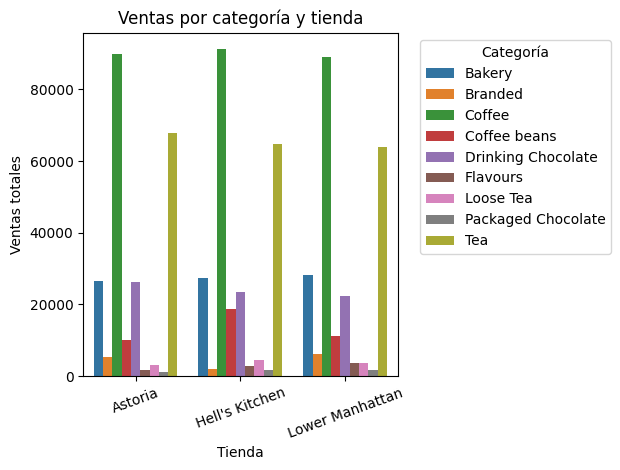

In [41]:
# 1) Ventas por categoría y tienda
sales_store_cat = coffee_df.groupby(['store_location', 'product_category'])['Total_Bill'].sum().reset_index()

plt.figure()
sns.barplot(data=sales_store_cat, x='store_location', y='Total_Bill', hue='product_category')
plt.title('Ventas por categoría y tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas totales')
plt.xticks(rotation=20)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

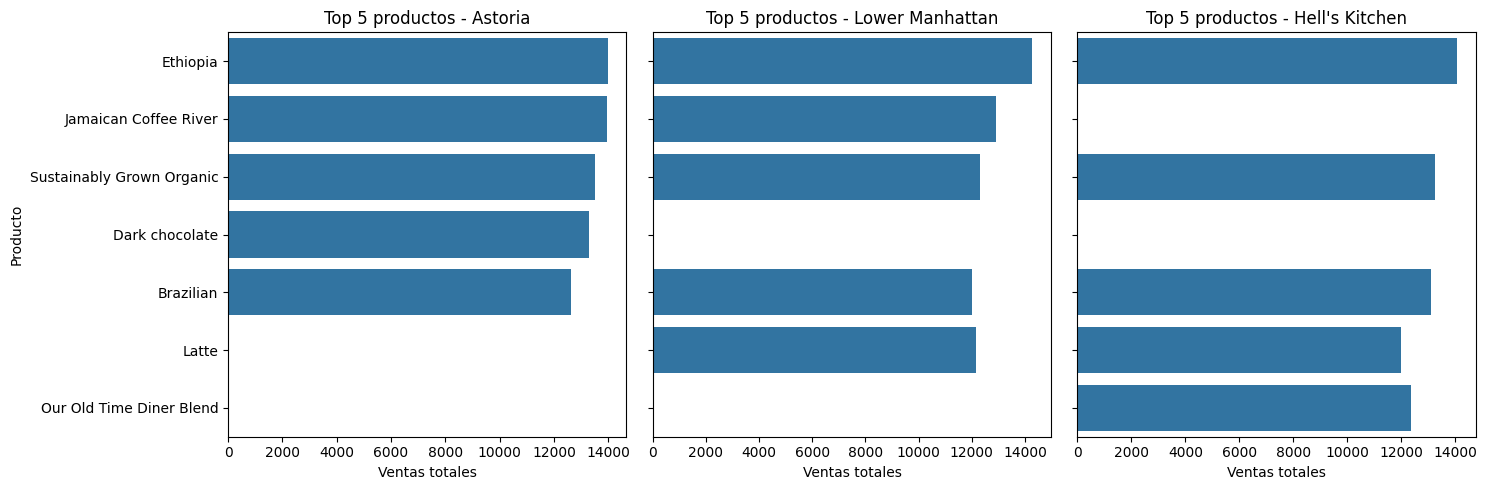

In [42]:
# 2) Top 5 productos por tienda (por ventas)
# Creamos una figura con 3 subgráficos, uno por tienda
stores_unique = coffee_df['store_location'].unique()

fig, axes = plt.subplots(1, len(stores_unique), figsize=(5 * len(stores_unique), 5), sharey=True)
if len(stores_unique) == 1:
    axes = [axes]

for idx, store in enumerate(stores_unique):
    df_store = coffee_df[coffee_df['store_location'] == store]
    top_products = df_store.groupby('product_detail')['Total_Bill'].sum().sort_values(ascending=False).head(5).reset_index()
    sns.barplot(data=top_products, x='Total_Bill', y='product_detail', ax=axes[idx])
    axes[idx].set_title('Top 5 productos - ' + store)
    axes[idx].set_xlabel('Ventas totales')
    axes[idx].set_ylabel('Producto')

plt.tight_layout()
plt.show()

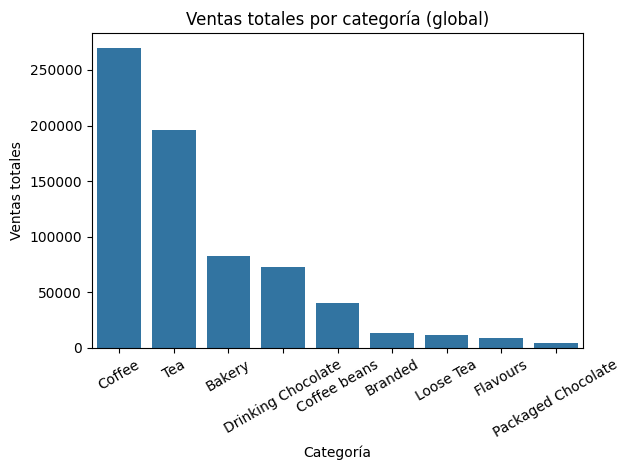

In [43]:
# product_categories
sales_by_cat = coffee_df.groupby('product_category')['Total_Bill'].sum().reset_index()

sns.barplot(data=sales_by_cat.sort_values('Total_Bill', ascending=False),
            x='product_category', y='Total_Bill')
plt.title('Ventas totales por categoría (global)')
plt.xlabel('Categoría')
plt.ylabel('Ventas totales')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Inferencial

In [46]:
# Análisis inferencial básico sobre el dataset de la cafetería
# Objetivos:
# 1) Probar si las ventas promedio difieren entre tiendas (ANOVA)
# 2) Ver correlación entre cantidad y total de la cuenta
# 3) Probar si el ticket promedio difiere por categoría de producto

# Asegurar tipos numéricos
coffee_df['Total_Bill'] = pd.to_numeric(coffee_df['Total_Bill'], errors='coerce')
coffee_df['transaction_qty'] = pd.to_numeric(coffee_df['transaction_qty'], errors='coerce')

# 1) ANOVA: ticket promedio por tienda
stores = coffee_df['store_location'].dropna().unique()
store_groups = [coffee_df[coffee_df['store_location'] == s]['Total_Bill'].dropna() for s in stores]

f_stat_store, p_val_store = stats.f_oneway(*store_groups)

# 2) Correlación entre cantidad y total de la cuenta
corr_qty_bill, p_corr_qty_bill = stats.pearsonr(coffee_df['transaction_qty'], coffee_df['Total_Bill'])

# 3) ANOVA: ticket promedio por categoría de producto
cats = coffee_df['product_category'].dropna().unique()
cat_groups = [coffee_df[coffee_df['product_category'] == c]['Total_Bill'].dropna() for c in cats]

f_stat_cat, p_val_cat = stats.f_oneway(*cat_groups)

print("ANOVA tiendas - F:", f_stat_store)
print("ANOVA tiendas - p:", p_val_store)
print("Correlación qty vs total - r:", corr_qty_bill)
print("Correlación qty vs total - p:", p_corr_qty_bill)
print("ANOVA categorías - F:", f_stat_cat)
print("ANOVA categorías - p:", p_val_cat)

ANOVA tiendas - F: 36.08891720148064
ANOVA tiendas - p: 2.1407919939753925e-16
Correlación qty vs total - r: 0.356230852623081
Correlación qty vs total - p: 0.0
ANOVA categorías - F: 9421.033589596738
ANOVA categorías - p: 0.0


In [48]:
# 1) Ticket promedio por tienda y categoría
avg_ticket_store_cat = coffee_df.groupby(['store_location', 'product_category'])['Total_Bill'].mean().reset_index()
print(avg_ticket_store_cat.head())

# 2) Modelo lineal: Total_Bill ~ store_location + product_category + transaction_qty + size
# Limpiamos filas con valores nulos relevantes
model_df = coffee_df[['Total_Bill', 'store_location', 'product_category', 'transaction_qty', 'Size']].dropna()

# Aseguramos tipos numéricos
model_df['Total_Bill'] = pd.to_numeric(model_df['Total_Bill'], errors='coerce')
model_df['transaction_qty'] = pd.to_numeric(model_df['transaction_qty'], errors='coerce')
model_df = model_df.dropna(subset=['Total_Bill', 'transaction_qty'])

# Usamos fórmula con variables categóricas
model = smf.ols('Total_Bill ~ C(store_location) + C(product_category) + C(Size) + transaction_qty', data=model_df).fit()

print(model.summary())

  store_location    product_category  Total_Bill
0        Astoria              Bakery    3.649300
1        Astoria             Branded   19.559140
2        Astoria              Coffee    4.481613
3        Astoria        Coffee beans   20.356972
4        Astoria  Drinking Chocolate    6.124477
                            OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.218e+04
Date:                Fri, 13 Feb 2026   Prob (F-statistic):               0.00
Time:                        18:22:01   Log-Likelihood:            -3.6968e+05
No. Observations:              149116   AIC:                         7.394e+05
Df Residuals:                  149101   BIC:                         7.395e+05
Df Model:                          14                                     

In [49]:
# Pendiente simple Total_Bill ~ transaction_qty (regresión lineal simple)
valid = coffee_df[['Total_Bill', 'transaction_qty']].dropna()
valid['Total_Bill'] = pd.to_numeric(valid['Total_Bill'], errors='coerce')
valid['transaction_qty'] = pd.to_numeric(valid['transaction_qty'], errors='coerce')
valid = valid.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(valid['transaction_qty'], valid['Total_Bill'])

print("Pendiente (impacto medio por unidad extra):")
print(slope)
print("Intercepto:")
print(intercept)
print("R cuadrado:")
print(r_value ** 2)
print("p valor pendiente:")
print(p_value)

# 3) Ticket promedio por Size
avg_ticket_size = coffee_df.groupby('Size')['Total_Bill'].mean().reset_index()
print(avg_ticket_size.head())

Pendiente (impacto medio por unidad extra):
2.775665946313511
Intercepto:
0.6941928062323393
R cuadrado:
0.12690042036056787
p valor pendiente:
0.0
          Size  Total_Bill
0        Large    5.301507
1  Not Defined    4.822547
2      Regular    4.362649
3        Small    3.332570
